# in vitro Ca 01 and 10 Timepoint (Alec's data)
### Directory Names for Data:

time prediciton data tacked onto the end 

In [1]:
# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

%load_ext autoreload
%autoreload 2

from turtles.turtles_utils import *

## Load Data

In [40]:
tdt_dir = '/mnt/c/Users/jonst/Box Sync/All_dNTP_data/'

data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Ca_Alec_twoPol_rec_4/rawDataFull/'

mg_control_conds = ['2-1', '2-2', '2-3']

ca_control_conds_10 = ['1-1', '1-2', '1-3']
ca_control_conds_01 = ['3-1', '3-2', '3-3']

figure_dir = tdt_dir + 'turtles/figures/'

os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

In [3]:
seqs_dict = read_seqs(data_dir, filename_end='trimmed.fq', cutoff=0, degen=5)

Loading 1-1
Read 865290 sequences...

Loading 1-2
Read 829967 sequences...

Loading 1-3
Read 809086 sequences...

Loading 2-1
Read 735495 sequences...

Loading 2-2
Read 742720 sequences...

Loading 2-3
Read 651954 sequences...

Loading 3-1
Read 743222 sequences...

Loading 3-2
Read 776197 sequences...

Loading 3-3
Read 684159 sequences...

Loading r01-1
Read 707303 sequences...

Loading r01-2
Read 689963 sequences...

Loading r01-3
Read 718654 sequences...

Loading r10-1
Read 733634 sequences...

Loading r10-2
Read 684650 sequences...

Loading r10-3
Read 601076 sequences...



### Choose Legend Labels for Plotting

In [4]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    cond = condition[:10]
    if '2-' in condition:
        condition_dict[condition] = '0 Control'
    elif 'r01-' in condition:
        condition_dict[condition] = '0->1'
    elif 'r10-' in condition:
        condition_dict[condition] = '1->0'
    elif '1-' in condition:
        condition_dict[condition] = '1 Control (1->0)'
    elif '3-' in condition:
        condition_dict[condition] = '1 Control (0->1)'
    else:
        print(condition, 'not recognized.')

print(condition_dict)

{'1-1': '1 Control (1->0)', '1-2': '1 Control (1->0)', '1-3': '1 Control (1->0)', '2-1': '0 Control', '2-2': '0 Control', '2-3': '0 Control', '3-1': '1 Control (0->1)', '3-2': '1 Control (0->1)', '3-3': '1 Control (0->1)', 'r01-1': '0->1', 'r01-2': '0->1', 'r01-3': '0->1', 'r10-1': '1->0', 'r10-2': '1->0', 'r10-3': '1->0'}


In [5]:
rep_dict = {}
for condition in conditions:
    rep_dict[condition] = int(condition.split('-')[-1])

## Calculate dNTP %s

In [6]:
counts_dict = get_norm_len_base_counts(seqs_dict, num_bins=1000)

1-1 processed

1-2 processed

1-3 processed

2-1 processed

2-2 processed

2-3 processed

3-1 processed

3-2 processed

3-3 processed

r01-1 processed

r01-2 processed

r01-3 processed

r10-1 processed

r10-2 processed

r10-3 processed



In [7]:
pcts_dict = calc_norm_len_base_pcts(counts_dict)

In [8]:
aitch_dict = calc_aitchison_distance(pcts_dict)

In [9]:
df_01 = generate_aitch_df(pcts_dict, aitch_dict, condition_dict, rep_dict, mg_control_conds, ca_control_conds_01)
df_10 = generate_aitch_df(pcts_dict, aitch_dict, condition_dict, rep_dict, mg_control_conds, ca_control_conds_10)

In [10]:
df_01.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,G % Aitch Diff from 0,T % Aitch Diff from 0,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %
0,1-1,1 Control (1->0),1,1,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
1,1-1,1 Control (1->0),1,2,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
2,1-1,1 Control (1->0),1,3,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
3,1-1,1 Control (1->0),1,4,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
4,1-1,1 Control (1->0),1,5,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485


In [11]:
df_01.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,G % Aitch Diff from 0,T % Aitch Diff from 0,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %
0,1-1,1 Control (1->0),1,1,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
1,1-1,1 Control (1->0),1,2,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
2,1-1,1 Control (1->0),1,3,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
3,1-1,1 Control (1->0),1,4,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485
4,1-1,1 Control (1->0),1,5,1.048061,0.433716,-0.056772,-0.012889,0.454598,-0.384937,...,0.136005,0.236722,0.078214,0.237679,0.352378,0.036485,0.225597,0.235717,0.3762,0.162485


In [12]:
df_10.Condition.unique()

array(['1 Control (1->0)', '0 Control', '1 Control (0->1)', '0->1',
       '1->0'], dtype=object)

In [13]:
data_01 = df_01[df_01.Condition != '1 Control (1->0)']
data_01 = data_01[data_01.Condition != '1->0']
data_10 = df_10[df_10.Condition != '1 Control (0->1)']
data_10 = data_10[data_10.Condition != '0->1']

data_01 = calc_signal(data_01, mg_control_conds, ca_control_conds_01, one_control_name='1 Control (0->1)')
data_10 = calc_signal(data_10, mg_control_conds, ca_control_conds_10, one_control_name='1 Control (1->0)')

# Time analysis 01

copied from another notebook - need to change data references

In [14]:
len_dists = get_length_dists(seqs_dict, max_len=150)

In [15]:
averages = parse_fastq_lengths(len_dists, expt_time=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min)
0,1-1,27.689672,17.296518,0.461495
1,1-2,33.866648,22.127243,0.564444
2,1-3,44.453306,27.629873,0.740888
3,2-1,28.379289,26.399200,0.472988
4,2-2,30.332727,27.238194,0.505545
5,2-3,30.936728,27.252814,0.515612
6,3-1,9.148698,6.631499,0.152478
7,3-2,8.956264,6.498065,0.149271
8,3-3,7.704668,5.994535,0.128411
9,r01-1,27.895612,26.185113,0.464927


In [16]:
calc_switch_bin(np.array(data_01.loc[data_01.Directory == 'r01-3'].Signal), mode='01')

871.8342245517338

In [17]:
from turtles.turtles_utils import *

In [18]:
#switch bin calc
averages01 = calc_switch_bins(averages, data_01, mode='01')
averages10 = calc_switch_bins(averages, data_10, mode='10')

print(averages01)
print(averages10)

   Directory       Mean   Std Devs  Rate (nt/min)  Switch Bin
0        1-1  27.689672  17.296518       0.461495         NaN
1        1-2  33.866648  22.127243       0.564444         NaN
2        1-3  44.453306  27.629873       0.740888         NaN
3        2-1  28.379289  26.399200       0.472988         NaN
4        2-2  30.332727  27.238194       0.505545         NaN
5        2-3  30.936728  27.252814       0.515612         NaN
6        3-1   9.148698   6.631499       0.152478   84.474179
7        3-2   8.956264   6.498065       0.149271  177.111379
8        3-3   7.704668   5.994535       0.128411         NaN
9      r01-1  27.895612  26.185113       0.464927  934.986883
10     r01-2  25.581746  28.009905       0.426362  875.650899
11     r01-3  22.505856  27.057004       0.375098  871.834225
12     r10-1  33.416069  27.253483       0.556934         NaN
13     r10-2  36.185158  27.776863       0.603086         NaN
14     r10-3  36.960525  28.397229       0.616009         NaN
   Direc

In [19]:
#switch time calc
averages01 = calc_switch_times(averages01, num_bins=1000, start_control_conds=mg_control_conds,
                               end_control_conds=ca_control_conds_01, t_expt=60)

print(averages01)

averages10 = calc_switch_times(averages10, num_bins=1000, start_control_conds=mg_control_conds,
                               end_control_conds=ca_control_conds_10, t_expt=60)

print(averages10)

   Directory       Mean   Std Devs  Rate (nt/min)  Switch Bin  Switch Time
0        1-1  27.689672  17.296518       0.461495         NaN          NaN
1        1-2  33.866648  22.127243       0.564444         NaN          NaN
2        1-3  44.453306  27.629873       0.740888         NaN          NaN
3        2-1  28.379289  26.399200       0.472988         NaN          NaN
4        2-2  30.332727  27.238194       0.505545         NaN          NaN
5        2-3  30.936728  27.252814       0.515612         NaN          NaN
6        3-1   9.148698   6.631499       0.152478   84.474179     1.552588
7        3-2   8.956264   6.498065       0.149271  177.111379     3.500936
8        3-3   7.704668   5.994535       0.128411         NaN          NaN
9      r01-1  27.895612  26.185113       0.464927  934.986883    48.327752
10     r01-2  25.581746  28.009905       0.426362  875.650899    40.180600
11     r01-3  22.505856  27.057004       0.375098  871.834225    39.718706
12     r10-1  33.416069  

In [20]:
print('Average 0->1:', averages01['Switch Time'][9:12].mean())
print('Std 0->1:', averages01['Switch Time'][9:12].std())
print()
print('Average 1->0:', averages10['Switch Time'][12:15].mean())
print('Std 1->0:', averages10['Switch Time'][12:15].std())

Average 0->1: 42.742352689726886
Std 0->1: 4.842608157426319

Average 1->0: 22.13796557315969
Std 1->0: 1.701380107720183


# Convert bin to time

In [21]:
def convert_bins_to_times(switch_bin, n_bins, switch_time, t_expt):
    times = []
    for bin_i in range(n_bins):
        if not np.isnan(switch_time):
            if bin_i < switch_bin:
                time_i = ((bin_i) / (switch_bin)) * (switch_time)
            else:
                time_i = ((bin_i - switch_bin) / (n_bins - switch_bin)) * (t_expt - switch_time) + switch_time
        else:
            time_i = (bin_i / n_bins) * t_expt
        times.append(time_i)
    return times

In [22]:
data_01['Time'] = None
texpt = 60

switch_bins = [np.nan] * 6 \
              + [averages01['Switch Bin'][9:12].mean()] * 3
              
switch_times = [np.nan] * 6 \
              + [averages01['Switch Time'][9:12].mean()] * 3

for directory, switch_bin, switch_time in zip(data_01.Directory.unique(), switch_bins, switch_times):
    data_01.loc[data_01.Directory == directory, 'Time'] = convert_bins_to_times(switch_bin, 1000, switch_time, texpt)

In [23]:
data_10['Time'] = None
texpt = 60

switch_bins = [np.nan] * 6 \
              + [averages01['Switch Bin'][12:15].mean()] * 3
              
switch_times = [np.nan] * 6 \
              + [averages01['Switch Time'][12:15].mean()] * 3

for directory, switch_bin, switch_time in zip(data_10.Directory.unique(), switch_bins, switch_times):
    data_10.loc[data_10.Directory == directory, 'Time'] = convert_bins_to_times(switch_bin, 1000, switch_time, texpt)

In [24]:
data_01.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal,Time
3000,2-1,0 Control,1,1,0.017429,1.254188,-0.81467,0.637828,0.315329,-0.138487,...,0.888396,0.491647,0.282934,0.096751,0.413493,0.299508,0.190247,0.013706,0.004432,0.0
3001,2-1,0 Control,1,2,0.017429,1.254188,-0.81467,0.637828,0.315329,-0.138487,...,0.888396,0.491647,0.282934,0.096751,0.413493,0.299508,0.190247,0.013706,0.004432,0.06
3002,2-1,0 Control,1,3,0.017429,1.254188,-0.81467,0.637828,0.315329,-0.138487,...,0.888396,0.491647,0.282934,0.096751,0.413493,0.299508,0.190247,0.013706,0.004432,0.12
3003,2-1,0 Control,1,4,0.017429,1.254188,-0.81467,0.637828,0.315329,-0.138487,...,0.888396,0.491647,0.282934,0.096751,0.413493,0.299508,0.190247,0.013706,0.004432,0.18
3004,2-1,0 Control,1,5,0.017429,1.254188,-0.81467,0.637828,0.315329,-0.138487,...,0.888396,0.491647,0.282934,0.096751,0.413493,0.299508,0.190247,0.013706,0.004432,0.24


In [25]:
data_10.tail()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal,Time
14995,r10-3,1->0,3,996,0.179,1.31285,-0.957287,1.61879,-0.699622,0.038118,...,0.710015,0.912609,0.529127,0.055111,0.72446,0.071308,0.14912,0.119985,0.124405,59.7
14996,r10-3,1->0,3,997,0.179,1.31285,-0.957287,1.61879,-0.699622,0.038118,...,0.710015,0.912609,0.529127,0.055111,0.72446,0.071308,0.14912,0.119985,0.124405,59.76
14997,r10-3,1->0,3,998,0.179,1.31285,-0.957287,1.61879,-0.699622,0.038118,...,0.710015,0.912609,0.529127,0.055111,0.72446,0.071308,0.14912,0.119985,0.124405,59.82
14998,r10-3,1->0,3,999,0.179,1.31285,-0.957287,1.61879,-0.699622,0.038118,...,0.710015,0.912609,0.529127,0.055111,0.72446,0.071308,0.14912,0.119985,0.124405,59.88
14999,r10-3,1->0,3,1000,0.179,1.31285,-0.957287,1.61879,-0.699622,0.038118,...,0.710015,0.912609,0.529127,0.055111,0.72446,0.071308,0.14912,0.119985,0.124405,59.94


# plot timepoint analysis 01

In [26]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

In [27]:
colors = [(241/255, 90/255, 36/255),    # 1 control
          (119/255, 178/255, 150/255),  # 0 control
          (41/255, 171/255, 226/255)]   # switch
sns.set_palette(sns.color_palette(colors))

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


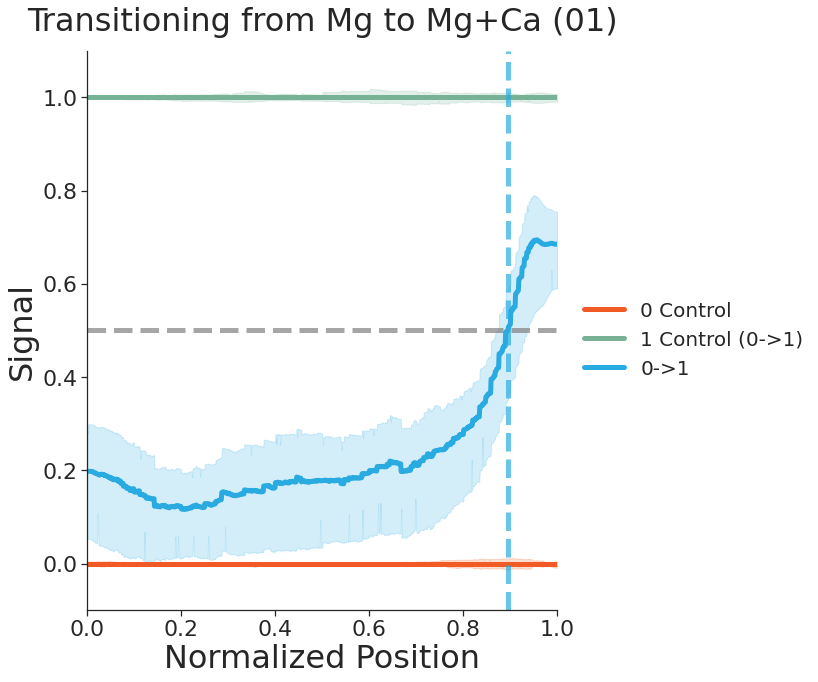

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

num_bins = 1000

SUBDATA=data_01[(data_01.Condition != 'No TdT Control') & (data_01.Condition != '1->0') & (data_01.Condition != '1 Control (1->0)')]

sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
             data=SUBDATA, ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, num_bins)
ax.set_xticks(range(0, num_bins + 1, int(num_bins / 5)))
ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
ax.set_xlabel('Normalized Position', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Transitioning from Mg to Mg+Ca (01)', fontsize=32, pad=20)

# Add switch bins
ax.axvline(averages01['Switch Bin'][9:12].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_01_Timepoint_Norm')
fig.savefig(figure_dir + 'Ca_01_Timepoint_Norm.svg')
plt.show()

Condition
0 Control           [1, 2, 3]
1 Control (1->0)    [1, 2, 3]
1->0                [1, 2, 3]
Name: Replicate, dtype: object


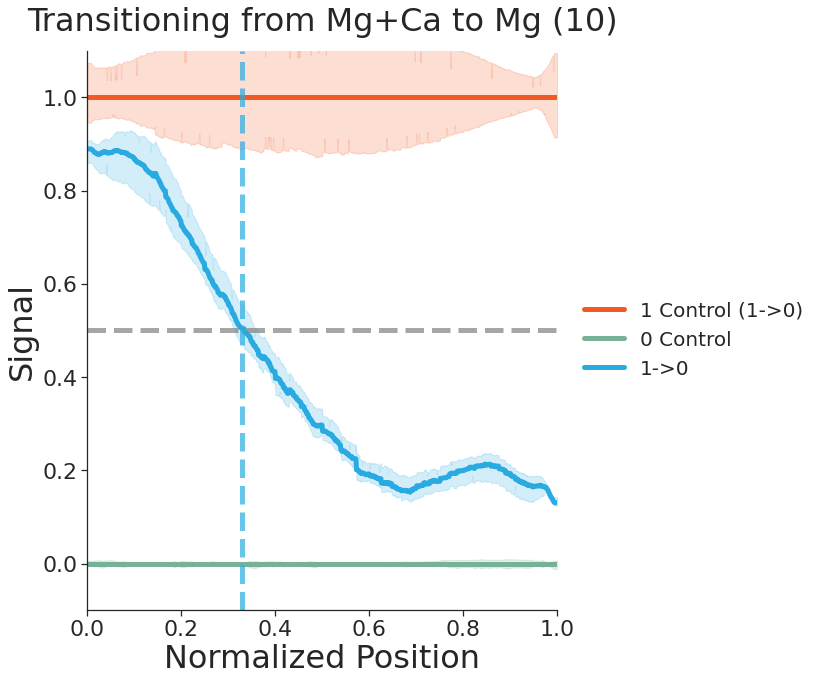

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

num_bins = 1000

SUBDATA=data_10[(data_10.Condition != 'No TdT Control') & (data_10.Condition != '0->1') & (data_10.Condition != '1 Control (0->1)')]

print(SUBDATA.groupby('Condition')['Replicate'].unique())

sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
             data=SUBDATA, ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, num_bins)
ax.set_xticks(range(0, num_bins + 1, int(num_bins / 5)))
ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
ax.set_xlabel('Normalized Position', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Transitioning from Mg+Ca to Mg (10)', fontsize=32, pad=20)

# Add switch bins
ax.axvline(averages10['Switch Bin'][12:15].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_10_Timepoint_Norm')
fig.savefig(figure_dir + 'Ca_10_Timepoint_Norm.svg')
plt.show()

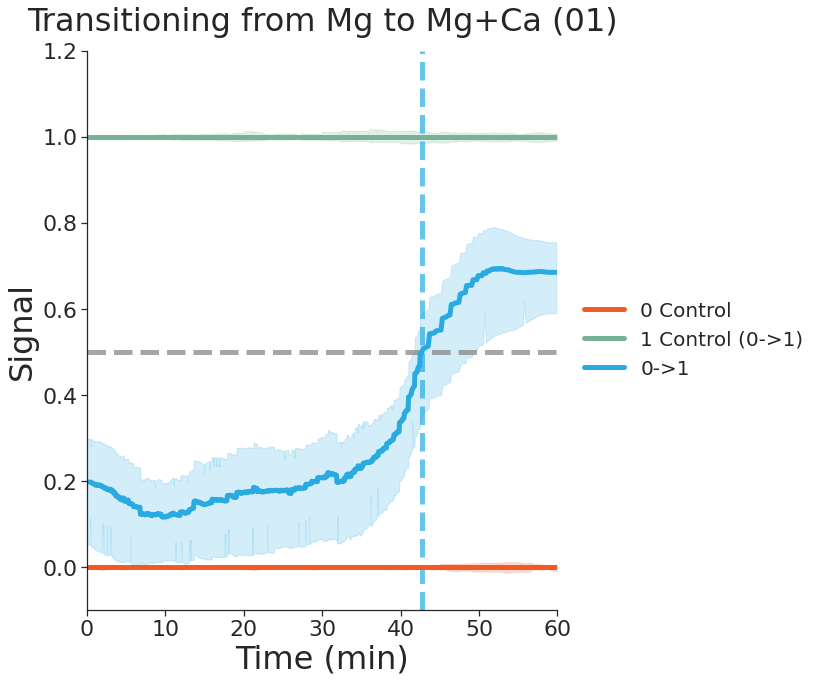

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

texpt = 60

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

# Add switch bins
ax.axvline(averages01.iloc[9:12, 5].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

SUBDATA=data_01[(data_01.Condition != 'No TdT Control') & (data_01.Condition != '1->0') & (data_01.Condition != '1 Control (1->0)')]

sns.lineplot(x='Time', y='Signal', hue='Condition', data=SUBDATA, ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, texpt)
ax.set_xticks(range(0, texpt + 1, int(texpt / 6)))
ax.set_xticklabels(np.arange(0, texpt + 1, 10, dtype=int))
ax.set_xlabel('Time (min)', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.2)
ax.set_title('Transitioning from Mg to Mg+Ca (01)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_01_Timepoint_Time')
fig.savefig(figure_dir + 'Ca_01_Timepoint_Time.svg')
plt.show()

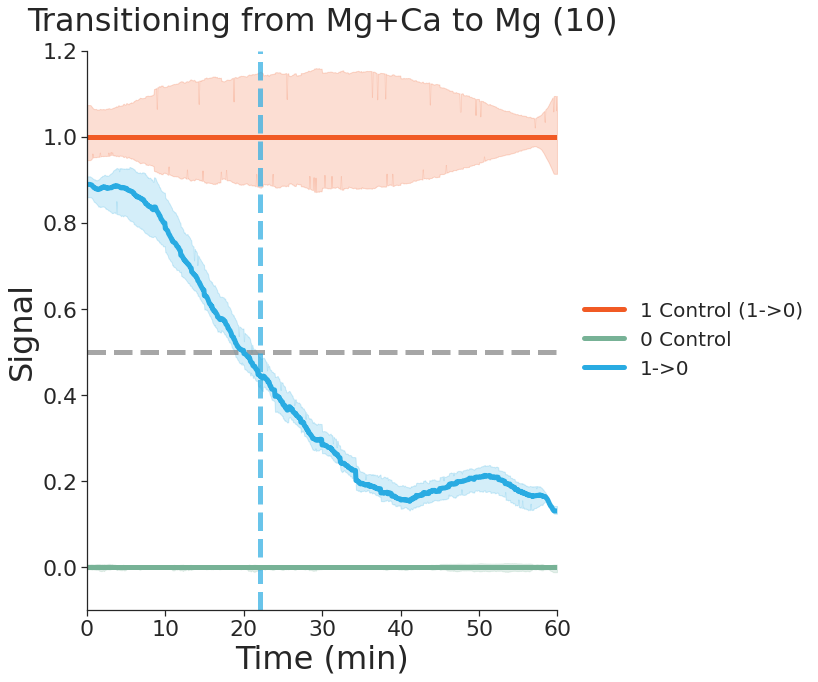

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

texpt = 60

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

# Add switch bins
ax.axvline(averages10.iloc[12:15, 5].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

SUBDATA=data_10[(data_10.Condition != 'No TdT Control') & (data_10.Condition != '0->1') & (data_10.Condition != '1 Control (0->1)')]

sns.lineplot(x='Time', y='Signal', hue='Condition', data=SUBDATA, ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, texpt)
ax.set_xticks(range(0, texpt + 1, int(texpt / 6)))
ax.set_xticklabels(np.arange(0, texpt + 1, 10, dtype=int))
ax.set_xlabel('Time (min)', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.2)
ax.set_title('Transitioning from Mg+Ca to Mg (10)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_10_Timepoint_Time')
fig.savefig(figure_dir + 'Ca_10_Timepoint_Time.svg')
plt.show()

# Step Plots

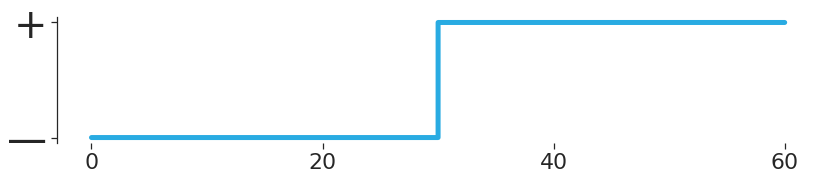

In [41]:
# 01 actual
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

step_plot_x = [0, 29.999, 30.001, 60]
step_plot_y = [0, 0, 1, 1]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_01_StepPlot_Actual')
fig.savefig(figure_dir + 'Ca_01_StepPlot_Actual.svg')
plt.show()

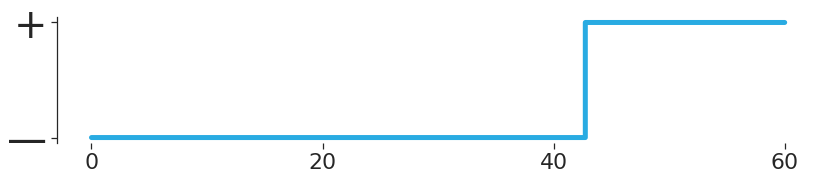

In [42]:
# 01 predicted
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

avg = averages01['Switch Time'][9:12].mean()

step_plot_x = [0, avg - 0.0001, avg + 0.0001, 60]
step_plot_y = [0, 0, 1, 1]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_01_StepPlot_Predicted')
fig.savefig(figure_dir + 'Ca_01_StepPlot_Predicted.svg')
plt.show()

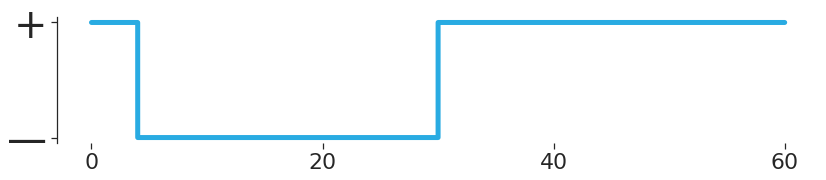

In [43]:
# 01 predicted (Josh)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

avg = averages01['Switch Time'][9:12].mean()

step_plot_x = [0, 3.999, 4.001, 29.999, 30.001, 60]
step_plot_y = [1, 1, 0, 0, 1, 1]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_01_StepPlot_Predicted_Josh')
fig.savefig(figure_dir + 'Ca_01_StepPlot_Predicted_Josh.svg')
plt.show()

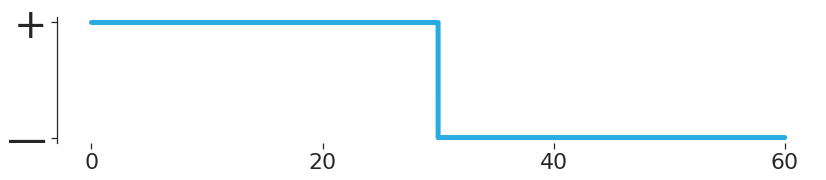

In [44]:
# 10 actual
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

step_plot_x = [0, 29.999, 30.001, 60]
step_plot_y = [1, 1, 0, 0]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_10_StepPlot_Actual')
fig.savefig(figure_dir + 'Ca_10_StepPlot_Actual.svg')
plt.show()

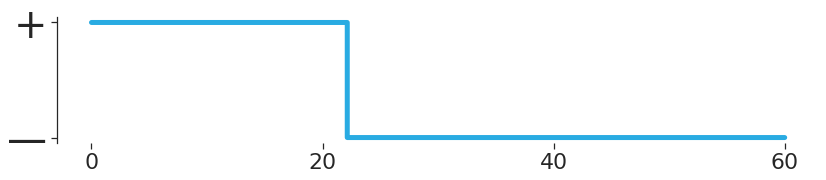

In [45]:
# 10 predicted
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

avg = averages10['Switch Time'][12:15].mean()

step_plot_x = [0, avg - 0.0001, avg + 0.0001, 60]
step_plot_y = [1, 1, 0, 0]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_10_StepPlot_Predicted')
fig.savefig(figure_dir + 'Ca_10_StepPlot_Predicted.svg')
plt.show()

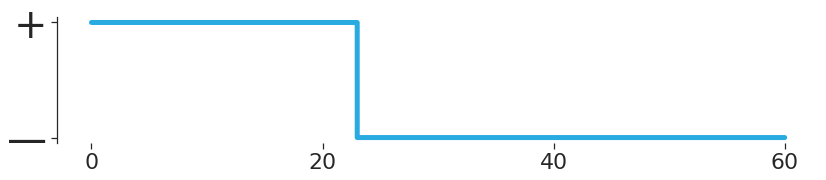

In [46]:
# 10 predicted (Josh)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

step_plot_x = [0, 22.999, 23.001, 60]
step_plot_y = [1, 1, 0, 0]
    
sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 20, 40, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Ca_10_StepPlot_Predicted_Josh')
fig.savefig(figure_dir + 'Ca_10_StepPlot_Predicted_Josh.svg')
plt.show()